In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler


In [2]:
df = pd.read_csv('churn_data.csv')
df.head()


,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,...,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,CLTV,Churn Reason
0,3668-QPYBK,1,United States,California,Los Angeles,90003,"33.964131, -118.272783",33.964131,-118.272783,Male,...,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1,86,3239,Competitor made better offer
1,9237-HQITU,1,United States,California,Los Angeles,90005,"34.059281, -118.30742",34.059281,-118.307420,Female,...,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1,67,2701,Moved
2,9305-CDSKC,1,United States,California,Los Angeles,90006,"34.048013, -118.293953",34.048013,-118.293953,Female,...,Month-to-month,Yes,Electronic check,99.65,820.5,Yes,1,86,5372,Moved
3,7892-POOKP,1,United States,California,Los Angeles,90010,"34.062125, -118.315709",34.062125,-118.315709,Female,...,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes,1,84,5003,Moved
4,0280-XJGEX,1,United States,California,Los Angeles,90015,"34.039224, -118.266293",34.039224,-118.266293,Male,...,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,Yes,1,89,5340,Competitor had better devices


In [3]:
# converts total charges from string to float
df['Total Charges'] = df['Total Charges'].replace(r'^\s*$', np.nan, regex=True)
df['Total Charges'] = df['Total Charges'].astype(float)
# choosing variables apart from latitude, longitude, zip code
df = df.drop(['CustomerID', 'Count', 'Country', 'State', 'City',
             'Churn Reason', 'Churn Score', 'Churn Label', 'CLTV'], axis=1)
df = df.drop(['Zip Code', 'Lat Long', 'Latitude', 'Longitude'], axis=1)

df = df.dropna()

y = df['Churn Value']
X = df.drop('Churn Value', axis=1)
df.head()


,Gender,Senior Citizen,Partner,Dependents,Tenure Months,Phone Service,Multiple Lines,Internet Service,Online Security,Online Backup,Device Protection,Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Value
0,Male,No,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
1,Female,No,No,Yes,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1
2,Female,No,No,Yes,8,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.50,1
3,Female,No,Yes,Yes,28,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,1
4,Male,No,No,Yes,49,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.30,1


In [4]:
df_encoded = pd.get_dummies(X, columns=['Gender', 'Senior Citizen', 'Partner', 'Dependents', 'Phone Service', 'Multiple Lines', 'Internet Service', 'Online Security',
                            'Online Backup', 'Device Protection', 'Tech Support', 'Streaming TV', 'Streaming Movies', 'Contract', 'Paperless Billing', 'Payment Method'], drop_first=True)
pd.set_option('display.max_columns', None)
df_encoded.head()
df.isna()


,Gender,Senior Citizen,Partner,Dependents,Tenure Months,Phone Service,Multiple Lines,Internet Service,Online Security,Online Backup,Device Protection,Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Value
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
7039,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
7040,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
7041,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [5]:
X_encoded = df_encoded.drop(['Online Security_No internet service', 'Device Protection_No internet service',
                            'Tech Support_No internet service', 'Streaming TV_No internet service', 'Streaming Movies_No internet service'], axis=1)


In [6]:
# Standard scaling on numerical variables
scaler = StandardScaler()
X_encoded[['Tenure Months', 'Monthly Charges', 'Total Charges']] = scaler.fit_transform(
    X_encoded[['Tenure Months', 'Monthly Charges', 'Total Charges']])


## AdaBoost Modelling

In [7]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split, RepeatedStratifiedKFold, cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, roc_curve, auc, roc_auc_score, classification_report, f1_score
from imblearn.over_sampling import RandomOverSampler
from numpy import mean
from numpy import std

X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, random_state=42)

# Resampling to avoid bias to no churn
oversample = RandomOverSampler(sampling_strategy=0.5, random_state=42)
X_train, y_train = oversample.fit_resample(X_train, y_train)

model = AdaBoostClassifier()



>10 0.776 (0.017)
>50 0.786 (0.015)
>100 0.787 (0.016)
>500 0.791 (0.016)
>1000 0.790 (0.017)
>5000 0.786 (0.019)


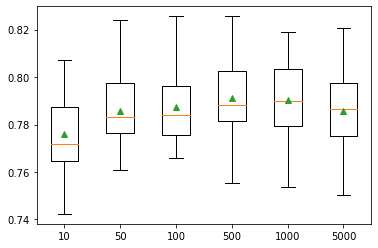

In [8]:
# Testing number of trees

models = dict()
# define number of trees to consider
n_trees = [10, 50, 100, 500, 1000, 5000]

for n_tree in n_trees:
	models[n_tree] = AdaBoostClassifier(n_estimators=n_tree)

# Evaluating models and saving performance
def evaluate_model(model, X, y):
	# define the evaluation procedure
	cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
	# evaluate the model and collect the results
	scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
	return scores



# evaluate the models and store results
results, names = list(), list()

performance_dict = {}

for n_tree, model in models.items():
	# evaluate the model
	scores = evaluate_model(model, X_train, y_train)
	# store the results

	performance_dict[n_tree] = scores
	# results.append(scores)
	# names.append(n_tree)
	# summarize the performance along the way
	print('>%s %.3f (%.3f)' % (n_tree, mean(scores), std(scores)))
# plot model performance for comparison
plt.boxplot(performance_dict.values(), labels=performance_dict.keys(), showmeans=True)
plt.show()

# 500 seems to be optimal parameter (lower variance)
# 1000 has a higher accuracy but a higher variance 


In [9]:
# Create an AdaBoost classifier with Decision Tree as the base estimator
ada_boost = AdaBoostClassifier(n_estimators=500, base_estimator = DecisionTreeClassifier(max_depth = 1) ,random_state=42)
ada_boost.fit(X_train, y_train)


AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1),
                   n_estimators=500, random_state=42)

In [10]:
def evaluate_model(name, train_preds, test_preds):
    print(f"Evaluation of {name} model:")
    print("Training set:")
    print("F1 Score (Per Class):", f1_score(y_train, np.round(train_preds), average=None))
    print("AUC Score:", roc_auc_score(y_train, train_preds))

    cm_train = confusion_matrix(y_train, np.round(train_preds))
    cm_train_percent = cm_train / cm_train.sum(axis=1, keepdims=True) * 100
    sns.heatmap(cm_train_percent, annot=True, fmt='.2f', cmap='Blues')
    plt.title(f"Confusion matrix ({name} model) - Training set (Percentages)")
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

    print("Test set:")
    print("F1 Score (Per Class):", f1_score(y_test, np.round(test_preds), average=None))
    print("AUC Score:", roc_auc_score(y_test, test_preds))

    cm_test = confusion_matrix(y_test, np.round(test_preds))
    cm_test_percent = cm_test / cm_test.sum(axis=1, keepdims=True) * 100
    sns.heatmap(cm_test_percent, annot=True, fmt='.2f', cmap='Blues')
    plt.title(f"Confusion matrix ({name} model) - Test set (Percentages)")
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()


Evaluation of AdaBoost model:
Training set:
F1 Score (Per Class): [0.86148735 0.72076249]
AUC Score: 0.7903813820356352


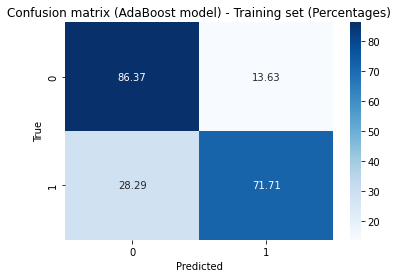

Test set:
F1 Score (Per Class): [0.86103324 0.65947007]
AUC Score: 0.7639366991776629


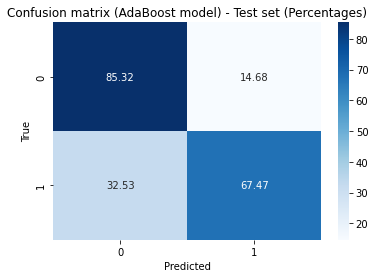

In [11]:
train_preds = ada_boost.predict(X_train)
test_preds = ada_boost.predict(X_test)
evaluate_model("AdaBoost", train_preds, test_preds)